# Plot LA Homeless Rates/Numbers by CD

Download shapefiles from latimes: http://boundaries.latimes.com/sets/

Then use LAHSA data as a color code by district.

In [41]:
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

In [4]:
hoods = gpd.read_file("la-city-council-districts-2012/l.a. city council district (2012).shp")

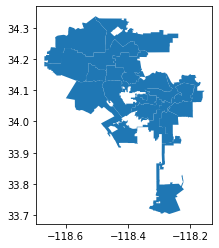

In [51]:
#show all districts:

hoods.plot()

In [122]:
#use the percent change 2018-2019 as a color column:

percent_changes = [.17, .31, .46, .53, .15, -.11, -.26, .24, .37, .21, .13, .02, -.01, .11, .47]
hoods1 = hoods
hoods1 = hoods1.sort_values(by='DISTRICT')
hoods1['color'] = percent_changes
hoods1

,slug,set,kind,external_i,name,display_na,DISTRICT,geometry,color
6,1-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),1,1,1 L.A. City Council District (2012),01,"POLYGON ((-118.299979 34.052221, -118.291003 3...",0.17
7,2-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),2,2,2 L.A. City Council District (2012),02,"POLYGON ((-118.439975 34.17575, -118.439982 34...",0.31
8,3-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),3,3,3 L.A. City Council District (2012),03,"POLYGON ((-118.546087 34.220576, -118.546026 3...",0.46
9,4-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),4,4,4 L.A. City Council District (2012),04,"POLYGON ((-118.356308 34.168775, -118.356253 3...",0.53
10,5-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),5,5,5 L.A. City Council District (2012),05,"POLYGON ((-118.390913 34.031208, -118.38776 34...",0.15
11,6-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),6,6,6 L.A. City Council District (2012),06,"POLYGON ((-118.366475 34.22992, -118.359213 34...",-0.11
12,7-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),7,7,7 L.A. City Council District (2012),07,"POLYGON ((-118.506637 34.335173, -118.50381 34...",-0.26
13,8-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),8,8,8 L.A. City Council District (2012),08,"POLYGON ((-118.284009 34.037034, -118.283965 3...",0.24
14,9-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),9,9,9 L.A. City Council District (2012),09,"POLYGON ((-118.269467 34.035943, -118.270817 3...",0.37
0,10-la-city-council-district-2012,L.A. City Council Districts (2012),L.A. City Council District (2012),10,10,10 L.A. City Council District (2012),10,"POLYGON ((-118.291662 34.069052, -118.291644 3...",0.21


In [123]:
#add a coordinate at which to insert a label:

hoods1['coords'] = hoods1['geometry'].apply(lambda x: x.representative_point().coords[:])
hoods1['coords'] = [coords[0] for coords in hoods1['coords']]

<Figure size 1080x720 with 0 Axes>

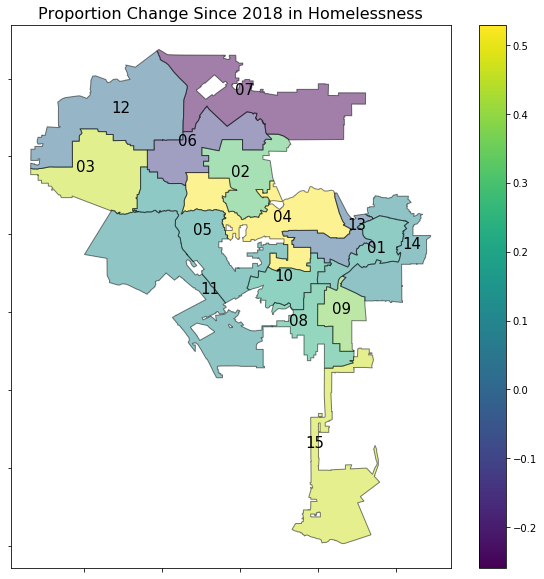

In [126]:
plt.figure(figsize=(15,10))
hoods1['color'] = percent_changes
hoods1.plot(column='color', cmap='viridis', legend=True, figsize=(10,10), edgecolor="black", alpha=0.5)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
for idx, row in hoods1.iterrows():
    plt.annotate(s=row['DISTRICT'], xy=row['coords'],
                 horizontalalignment='center', fontsize=15)
    
plt.title("Proportion Change Since 2018 in Homelessness", fontsize=16)
plt.savefig("districts_by_percent_change")

In [166]:
navy = "#1E3066"
light_blue = "#2BC2E8"
yellow = "#FCF06E"
gold = "#F2D936"

#color key: navy = negative, light blue = 0-.24, yellow = .24-.49, gold = >.5

colors = [light_blue, "yellow", "yellow", "gold", light_blue, "grey", "grey", light_blue, "yellow", 
          light_blue, light_blue, light_blue, "grey", light_blue, "yellow"]
len(colors)

15

In [150]:
import matplotlib.patches as mpatches

<Figure size 1080x720 with 0 Axes>

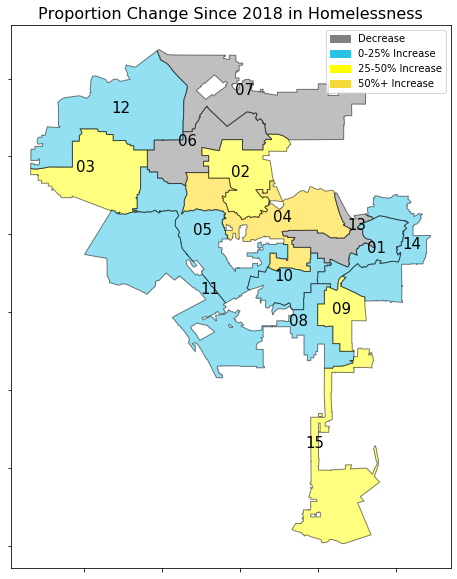

In [167]:
plt.figure(figsize=(15,10))
navy_patch = mpatches.Patch(color="grey", label="Decrease")
light_blue_patch = mpatches.Patch(color=light_blue, label="0-25% Increase")
yellow_patch = mpatches.Patch(color="yellow", label="25-50% Increase")
gold_patch = mpatches.Patch(color=gold, label="50%+ Increase")




hoods1.plot(color=colors, legend=True, figsize=(10,10), edgecolor="black", alpha=0.5)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
for idx, row in hoods1.iterrows():
    plt.annotate(s=row['DISTRICT'], xy=row['coords'],
                 horizontalalignment='center', fontsize=15)
plt.legend(handles=[navy_patch, light_blue_patch, yellow_patch, gold_patch])
plt.title("Proportion Change Since 2018 in Homelessness", fontsize=16)
plt.savefig("districts_by_percent_change")